In [37]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import os
from sklearn.externals import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt

In [101]:
def train_model(data):
    x = data[data.columns[:-1]]
    y = data[data.columns[-1]]
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.3,random_state=0)
    # model = RandomForestClassifier(criterion='gini',max_depth=10,min_impurity_split=5)
    model = LogisticRegression(penalty='l2',C=10,class_weight='balanced')
    model.fit(x_train,y_train)
    # joblib.dump(model,'lg_model.pkl')
    y_valid_pred = model.predict(x_valid)
    print("验证集中的准确率：",accuracy_score(y_valid,y_valid_pred))
    print("验证集查准率：",precision_score(y_valid,y_valid_pred))
    print("验证集召回率：",recall_score(y_valid,y_valid_pred))
    print("验证集F1值：",f1_score(y_valid,y_valid_pred))
    y_valid_proba = model.predict_proba(x_valid)
    # print (y_valid_proba)
    y_valid_proba = y_valid_proba[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_valid_proba)
    auc = metrics.auc(fpr, tpr)
    print('AUC = ', auc)

In [102]:
raw_data = pd.read_csv('train.csv')
raw_data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [103]:
data = raw_data.copy()
all_normal_data = raw_data.copy()

In [104]:
object_columns = raw_data.select_dtypes(include=["object"]).columns
num_columns = raw_data.select_dtypes(include=[np.number]).columns
object_columns,"object><number",num_columns

(Index(['workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'sex', 'native_country', 'income'],
       dtype='object'),
 'object><number',
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
        'hours_per_week'],
       dtype='object'))

In [105]:
scaler = MinMaxScaler()
raw_data[num_columns]=scaler.fit_transform(raw_data[num_columns])
raw_data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K


In [106]:
for name in object_columns:
    raw_data[name] = pd.Categorical(raw_data[name]).codes
raw_data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,7,0.044302,9,0.8,4,1,1,4,1,0.02174,0.0,0.397959,39,0
1,0.452055,6,0.048238,9,0.8,2,4,0,4,1,0.00000,0.0,0.122449,39,0


In [107]:
train_model(raw_data)

验证集中的准确率： 0.767120483161
验证集查准率： 0.511993382961
验证集召回率： 0.786198137172
验证集F1值： 0.620136917682
AUC =  0.855566232688


In [110]:
for name in data.columns:
    data[name] = pd.Categorical(data[name]).codes

In [93]:
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0


In [111]:
train_model(data)

验证集中的准确率： 0.76927014024
验证集查准率： 0.515016685206
验证集召回率： 0.784081287045
验证集F1值： 0.621685129238
AUC =  0.854864102623


In [112]:
data.dtypes

age                int8
workclass          int8
fnlwgt            int16
education          int8
education_num      int8
marital_status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital_gain       int8
capital_loss       int8
hours_per_week     int8
native_country     int8
income             int8
dtype: object

In [121]:
all_normal_data
for name in all_normal_data.columns:
    all_normal_data[name] = pd.Categorical(all_normal_data[name]).codes

In [125]:
scaler = MinMaxScaler()
all_normal_data = scaler.fit_transform(all_normal_data)

In [128]:
train_model(pd.DataFrame(all_normal_data))

验证集中的准确率： 0.769167775617
验证集查准率： 0.514873505699
验证集召回率： 0.784081287045
验证集F1值： 0.621580802148
AUC =  0.854891309877


In [6]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [7]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [8]:
print(y_train.mean())
print(y_valid.mean())

0.240391365391
0.241785239021


In [9]:
pd.value_counts(y_train)

0    17313
1     5479
Name: income, dtype: int64

In [10]:
# model = RandomForestClassifier(criterion='gini',max_depth=10,min_impurity_split=5)
model = LogisticRegression(penalty='l2',C=10,class_weight='balanced')
model.fit(x_train,y_train)
joblib.dump(model,'lg_model.pkl')

['lg_model.pkl']

In [11]:
y_train_pred = model.predict(x_train)

#准确率 (t)/sum
print("训练集准确率：",accuracy_score(y_train,y_train_pred))
#tp / (tp + fp)
print("训练集查准率：",precision_score(y_train,y_train_pred))
#tp / (tp + fn)
print("训练集召回率：",recall_score(y_train,y_train_pred))
# F1 = 2 * (precision * recall) / (precision + recall)
print("训练集F1值：",f1_score(y_train,y_train_pred))

训练集准确率： 0.770621270621
训练集查准率： 0.515381786984
训练集召回率： 0.767475816755
训练集F1值： 0.616659334213


In [12]:
y_valid_pred = model.predict(x_valid)
print("验证集中的准确率：",accuracy_score(y_valid,y_valid_pred))
print("验证集查准率：",precision_score(y_valid,y_valid_pred))
print("验证集召回率：",recall_score(y_valid,y_valid_pred))
print("验证集F1值：",f1_score(y_valid,y_valid_pred))

验证集中的准确率： 0.769372504862
验证集查准率： 0.515151515152
验证集召回率： 0.78450465707
验证集F1值： 0.621916428931


In [13]:
y_valid_proba = model.predict_proba(x_valid)
# print (y_valid_proba)
y_valid_proba = y_valid_proba[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_valid_proba)
auc = metrics.auc(fpr, tpr)
print('AUC = ', auc)

AUC =  0.854867074844


In [14]:
plt.rcParams['font.sans-serif']=['Arial Unicode MS'] # mac 本机系统字体
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

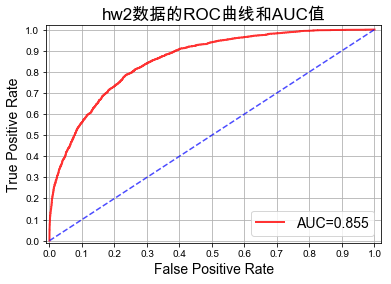

In [15]:
plt.figure(facecolor='w')
plt.plot(fpr, tpr, 'r-', lw=2, alpha=0.8, label='AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c='b', lw=1.5, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.grid(b=True)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=14)
plt.title('hw2数据的ROC曲线和AUC值', fontsize=17)
plt.show()

In [16]:
test_data = pd.read_csv("test.csv")
for name in test_data.columns:
    test_data[name] = pd.Categorical(test_data[name]).codes
x_test = test_data
y_test_pred = model.predict(x_test)
y_test_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int8)